<a href="https://colab.research.google.com/github/Hataeju/DATAPREPROCESSING/blob/main/%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드

In [3]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [48]:
# 전처리를 위한 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# 데이터 파일 로드
colab_path = "gdrive/My Drive/AI보안교육/IRIS/"
df = pd.read_csv(colab_path + 'part3_iris_modified.csv')

# 분석용 데이터 준비 - 결측치 처리

In [39]:
# 로드된 데이터 확인
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,NaN,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,NaN,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.groupby('target').mean()

,sepal_length,sepal_width,petal_length,petal_width
target,,,,
setosa,5.006,3.440909,1.462,0.246
versicolor,5.936,2.764583,4.260,1.326
virginica,6.588,2.964444,6.152,2.026


In [ ]:
df.groupby('target').max()

,sepal_length,sepal_width,petal_length,petal_width
target,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,15.9,2.5


In [ ]:
df[(df['petal_length']>=1.5)&(df['sepal_width']<3.5)]

,sepal_length,sepal_width,petal_length,petal_width,target
7,5.0,3.4,1.5,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
11,4.8,3.4,1.6,0.2,setosa
20,5.4,3.4,1.7,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 결측치 존재 확인

In [21]:
# 결측치 존재여부 확인
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,target
0,False,False,False,False,False
1,False,True,False,False,False
2,False,False,False,False,False
3,False,True,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [22]:
# True = 1로도 해석된다는 점을 이용하여 평균값 산정 (= Column별 결측치 비율)
df.isnull().mean()*100

,0
sepal_length,0.000000
sepal_width,8.666667
petal_length,0.000000
petal_width,0.000000
target,0.000000


In [24]:
# 결측치를 포함하는 데이터만 추출하여 확인
df[df['sepal_width'].isnull()]
df['sepai_width2']=df['sepal_width']
df

,sepal_length,sepal_width,petal_length,petal_width,target,sepai_width2
0,5.1,3.5,1.4,0.2,setosa,3.5
1,4.9,NaN,1.4,0.2,setosa,NaN
2,4.7,3.2,1.3,0.2,setosa,3.2
3,4.6,NaN,1.5,0.2,setosa,NaN
4,5.0,3.6,1.4,0.2,setosa,3.6
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3.0
146,6.3,2.5,5.0,1.9,virginica,2.5
147,6.5,3.0,5.2,2.0,virginica,3.0
148,6.2,3.4,5.4,2.3,virginica,3.4


### 결측치 포함 데이터를 제외

In [49]:
# 결측치 포함한 데이터를 제거
df_processed = df.dropna()
len(df_processed)

137

In [50]:
df.dropna()

len(df.dropna())

137

In [51]:
df_processed

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 결측치를 평균 값으로 대체

In [52]:
# 대체할 값 계산
replace_value = df['sepal_width'].mean().round(2)
replace_value

np.float64(3.05)

In [53]:
# 결측치 대체
df_processed = df.fillna({'sepal_width':replace_value})
df_processed

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.50,1.4,0.2,setosa
1,4.9,3.05,1.4,0.2,setosa
2,4.7,3.20,1.3,0.2,setosa
3,4.6,3.05,1.5,0.2,setosa
4,5.0,3.60,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.00,5.2,2.3,virginica
146,6.3,2.50,5.0,1.9,virginica
147,6.5,3.00,5.2,2.0,virginica
148,6.2,3.40,5.4,2.3,virginica


### 결측치를 이전/다음 값으로 대체

In [54]:
# 결측치를 이전/다음 값으로 대체 - 최근방대치법
df_processed = df.fillna(method='ffill')
df_processed

#df['sepal_width'] = df['sepal_width'].fillna(method='ffill')
#df

/tmp/ipython-input-54-3448631733.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_processed = df.fillna(method='ffill')


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.5,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.2,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [28]:
df['sepal_width2']=df['sepai_width2'].fillna(method='bfill')
df

/tmp/ipython-input-28-2599673361.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['sepal_width2']=df['sepai_width2'].fillna(method='bfill')


,sepal_length,sepal_width,petal_length,petal_width,target,sepai_width2,sepal_width2
0,5.1,3.5,1.4,0.2,setosa,3.5,3.5
1,4.9,3.5,1.4,0.2,setosa,NaN,3.2
2,4.7,3.2,1.3,0.2,setosa,3.2,3.2
3,4.6,3.2,1.5,0.2,setosa,NaN,3.6
4,5.0,3.6,1.4,0.2,setosa,3.6,3.6
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3.0,3.0
146,6.3,2.5,5.0,1.9,virginica,2.5,2.5
147,6.5,3.0,5.2,2.0,virginica,3.0,3.0
148,6.2,3.4,5.4,2.3,virginica,3.4,3.4


# 분석용 데이터 준비 - 이상값 처리

### 이상값 처리 (IQR 기준)

([<matplotlib.axis.XTick at 0x7fe5d7d85410>,
 [Text(1, 0, 'sepal_length'),
  Text(2, 0, 'sepal_width'),
  Text(3, 0, 'petal_length'),
  Text(4, 0, 'petal_width')])

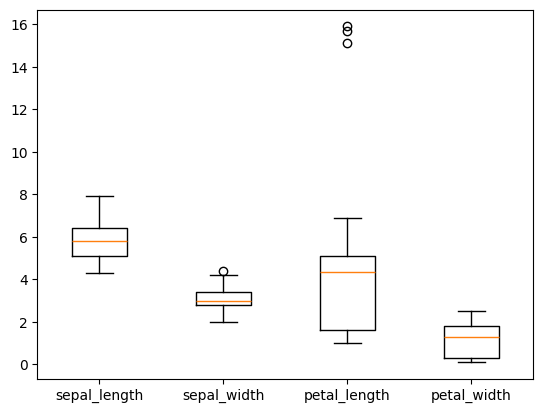

In [55]:
#결측치 처리를 수행한 df_processed를 이어서 사용한다.
# Box Plot을 그려 시각적으로 확인해본다.

plt.boxplot([df_processed['sepal_length'], df_processed['sepal_width'], df_processed['petal_length'], df_processed['petal_width']])
plt.xticks([1,2,3,4],['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [57]:
# 시각적으로 Outlier을 포함하는 것으로 보이는 'petal_length'에 대해 이상치 확인
# 1사분위수보다 1.5 IQR보다 작거나 3사분위수보다 1.5 IQR큰 수의 Boolean Array를 구한 후, 해당하는 데이터를 구한다
q1, q3 = np.percentile(df_processed['petal_length'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
outliner_filter = (df_processed['petal_length'] < lower_bound) | (df_processed['petal_length'] > upper_bound)
df_processed[outliner_filter]

,sepal_length,sepal_width,petal_length,petal_width,target
142,5.8,2.7,15.1,1.9,virginica
143,6.8,3.2,15.9,2.3,virginica
144,6.7,3.3,15.7,2.5,virginica


In [93]:
# 이상치를 제거
df_processed2 = df_processed[~outliner_filter]
len(df_processed2)

df_processed3 = df_processed[outliner_filter]
len(df_processed3)

3

### 이상값 처리 (z-score기준)

In [63]:
# petal_length 데이터 정규화 하기 (z-score 구하기)
petal_length_avg = df_processed['petal_length'].mean()
petal_length_std = df_processed['petal_length'].std()
z_score = (df_processed['petal_length'] - petal_length_avg)/petal_length_std
z_score[:3]

,petal_length
0,-1.060530
1,-1.060530
2,-1.101989


(array([0.5395978 , 0.11871152, 0.64751736, 0.28059085, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03237587]),
 array([-1.22636707, -0.60862301,  0.00912105,  0.62686511,  1.24460917,
         1.86235323,  2.48009729,  3.09784135,  3.71558541,  4.33332947,
         4.95107353]),
 <BarContainer object of 10 artists>)

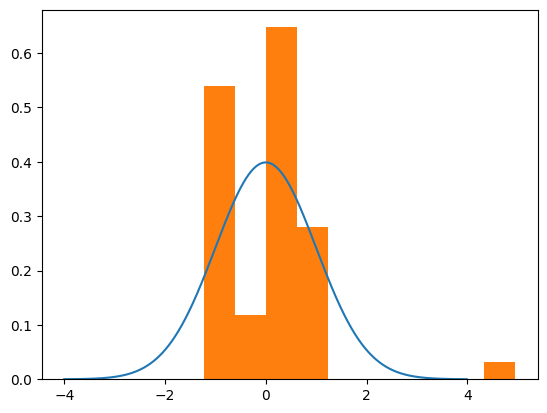

In [78]:
# z-score의 분포를 표준정규분포와 함께 plotting 하여 확인하기
x = np.arange(-4,4,0.01)
y = (lambda x: 1/np.sqrt(2*np.pi)/np.exp(x**2/2))(x)
plt.plot(x,y)
plt.hist(z_score, density=True)

In [79]:
# 이상치 확인
outliner_filter2 = ( z_score < -3) | (z_score > 3)
df_processed[outliner_filter2]

,sepal_length,sepal_width,petal_length,petal_width,target
142,5.8,2.7,15.1,1.9,virginica
143,6.8,3.2,15.9,2.3,virginica
144,6.7,3.3,15.7,2.5,virginica


In [80]:
# 이상치를 제거
df_processed2 = df_processed[~outliner_filter2]
len(df_processed2)

147

# 분석용 데이터 준비 - 데이터 정규화

In [81]:
from sklearn import preprocessing
# https://scikit-learn.org/stable/modules/preprocessing.html

# 결측치/이상치 처리를 수행한 df_processed2를 이어서 사용한다.
columns_to_scale = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [82]:
# z-score 스케일링 (표준 정규화)
df_scaled_standardized = df_processed2.copy()
scaler = preprocessing.StandardScaler()
df_scaled_standardized[columns_to_scale] = scaler.fit_transform(df_processed2[columns_to_scale])
df_scaled_standardized

,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.884454,0.966138,-1.320807,-1.300986,setosa
1,-1.126342,0.966138,-1.320807,-1.300986,setosa
2,-1.368230,0.309640,-1.377712,-1.300986,setosa
3,-1.489174,0.309640,-1.263902,-1.300986,setosa
4,-1.005398,1.184970,-1.320807,-1.300986,setosa
...,...,...,...,...,...
145,1.050649,-0.128024,0.841569,1.491882,virginica
146,0.566873,-1.222186,0.727760,0.959907,virginica
147,0.808761,-0.128024,0.841569,1.092901,virginica
148,0.445929,0.747305,0.955379,1.491882,virginica


In [83]:
# 표준 스케일링 (Min-Max 정규화)
df_scaled_normalized = df_processed2.copy()
scaler = preprocessing.MinMaxScaler()
df_scaled_normalized[columns_to_scale] = scaler.fit_transform(df_processed2[columns_to_scale])
df_scaled_normalized

,sepal_length,sepal_width,petal_length,petal_width,target
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.625000,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.500000,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,virginica
146,0.555556,0.208333,0.677966,0.750000,virginica
147,0.611111,0.416667,0.711864,0.791667,virginica
148,0.527778,0.583333,0.745763,0.916667,virginica


Text(0.5, 1.0, 'Min-Max scaled data')

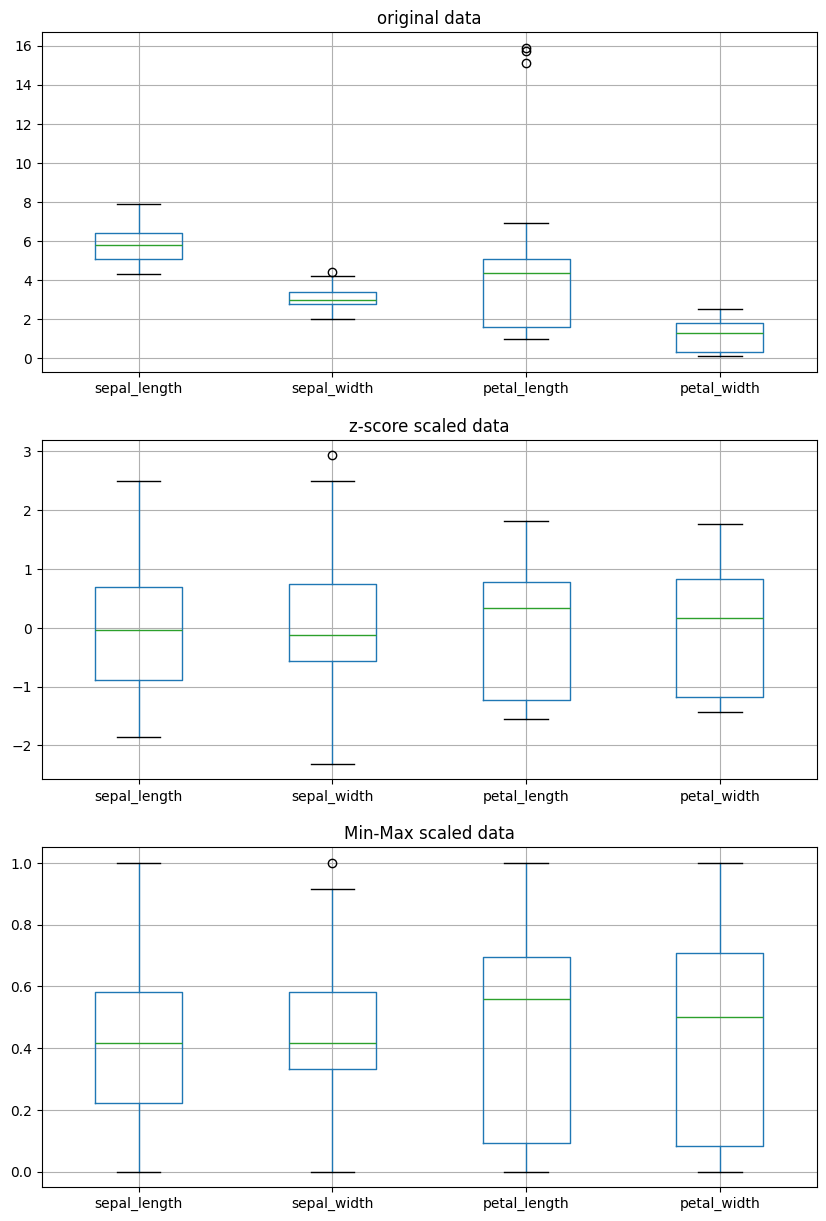

In [85]:
# 정규화 결과 비교
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
df_processed[columns_to_scale].boxplot()
plt.title('original data')
plt.subplot(3,1,2)
df_scaled_standardized[columns_to_scale].boxplot()
plt.title('z-score scaled data')
plt.subplot(3,1,3)
df_scaled_normalized[columns_to_scale].boxplot()
plt.title('Min-Max scaled data')

# 탐색적 분석 - 기초 통계량 추출

In [87]:
# pandas에서 제공하는 기초 통계량 제공 함수를 활용한다.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,137.000000,150.000000,150.000000
mean,5.843333,3.047445,3.958000,1.199333
std,0.828066,0.446733,2.412002,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,15.900000,2.500000


In [88]:
# 앞서 pandas 라이브러리 주요기능에서 살펴본 Column별 unique값, GroupBy를 통한 품종별 통계 등을 탐색해본다.
df.groupby('target').mean()

,sepal_length,sepal_width,petal_length,petal_width
target,,,,
setosa,5.006,3.440909,1.462,0.246
versicolor,5.936,2.764583,4.260,1.326
virginica,6.588,2.964444,6.152,2.026


# 탐색적 분석 - 산포도 분석

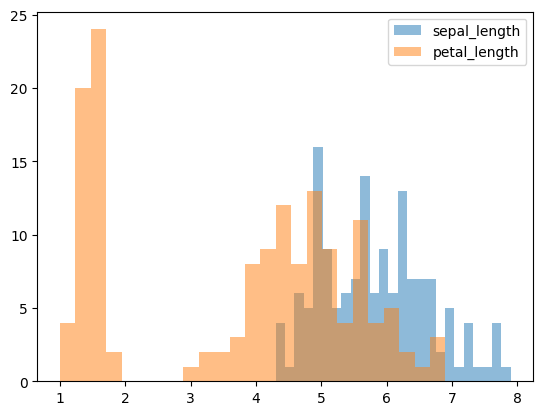

In [89]:
# 히스토그램
hist1 = df_processed2['sepal_length']
hist2 = df_processed2['petal_length']
plt.hist(hist1,label='sepal_length', alpha=0.5, bins = 25)
plt.hist(hist2,label='petal_length', alpha=0.5, bins = 25)
plt.legend(loc=0)


# 탐색적 분석 - 상관관계 분석

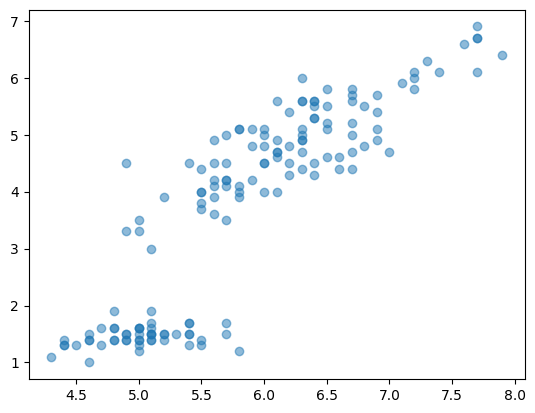

In [90]:
# Scatter Plot
X = df_processed2['sepal_length']
Y = df_processed2['petal_length']
plt.scatter(X, Y, alpha=0.5)

In [91]:
# 상관계수 구하기
np.corrcoef(X, Y)

array([[1.        , 0.87153436],
       [0.87153436, 1.        ]])

In [95]:
# 각 Feature간의 상관계수 구하기
#df_processed2.corr(method='pearson')

df_processed2.select_dtypes(include=['number']).corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.127275,0.871534,0.817918
sepal_width,-0.127275,1.000000,-0.442205,-0.398989
petal_length,0.871534,-0.442205,1.000000,0.963280
petal_width,0.817918,-0.398989,0.963280,1.000000
